# **BUSINESS UNDERSTANDING**

**Sepsis**
*Also known as Blood poisoning*

Sepsis is a life-threatening condition characterized by a sudden, severe, and inflammatory change in the blood, usually involving the circulatory system. It can lead to severe complications such as pneumonia, septic shock, or death.

Sepsis is usually caused by bacterial infections but may be the result of other infections such as viruses, parasites or fungi. Its treatment requires medical care, including the use of antimicrobials, intravenous fluids and other measures.

Sepsis can affect anyone, but people who are older, very young, pregnant or have other health problems are at higher risk.

**GOAL** The purpose for this study is to identify whether a patient who is in ICU is likely to develop sepsis or not.

**HYPOTHESIS**

*NULL HYPOTHESIS* - A patient's age in the ICU does not pose a higher risk for sepsis.

*ALTERNATIVE HYPOTHESIS* - A patient's age in the ICU poses a higher risk for sepsis.

**ANALYTICAL QUESTIONS**

1. Does the age of a patient in the Intensive Care Unit (ICU) have a higher risk of developing sepsis compared to a patient with a similar age who is not in the ICU?
2. Does a higher plasma glucose contribute to a patient in risk of sepsis
3. Does blood pressure correlate to the patient getting sepsis?
4. How does BMI influence a patient's risk for sepsis in the ICU?
5. Is there a comparison between the blood work results and the risk of sepsis?


### Data Fields

| Column   Name                | Attribute/Target | Description                                                                                                                                                                                                  |
|------------------------------|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ID                           | N/A              | Unique number to represent patient ID                                                                                                                                                                        |
| PRG           | Attribute1       |  Plasma glucose|
| PL               | Attribute 2     |   Blood Work Result-1 (mu U/ml)                                                                                                                                                |
| PR              | Attribute 3      | Blood Pressure (mm Hg)|
| SK              | Attribute 4      | Blood Work Result-2 (mm)|
| TS             | Attribute 5      |     Blood Work Result-3 (mu U/ml)|                                                                                  
| M11     | Attribute 6    |  Body mass index (weight in kg/(height in m)^2|
| BD2             | Attribute 7     |   Blood Work Result-4 (mu U/ml)|
| Age              | Attribute 8      |    patients age  (years)|
| Insurance | N/A     | If a patient holds a valid insurance card|
| Sepssis                 | Target           | Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise |

# **DATA UNDERSTANDING**

In [1]:
## IMPORT LIBRARIES 

import pandas as pd
import numpy as np
import os 
import joblib
import warnings
warnings.filterwarnings('ignore')

## Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

## Hypothesis testing
from scipy.stats import ttest_ind

## Modelling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import RobustScaler,LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif

from sklearn import metrics
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,auc
from sklearn.metrics import *
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold

**LOAD DATA**

In [2]:
df= pd.read_csv("Datafiles/Paitients_Files_Train.csv")
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


**EDA**

In [3]:
## Check for the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [4]:
## Check for missing values 
df.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [5]:
## Check for duplicates 
df.duplicated().sum()

np.int64(0)

In [6]:
## Check for statistical data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


**UNIVARIATE ANALYSIS**

Skewness of the data:
PRG          0.91
PL           0.12
PR          -1.87
SK           0.16
TS           2.40
M11         -0.41
BD2          1.99
Age          1.15
Insurance   -0.80
dtype: float64


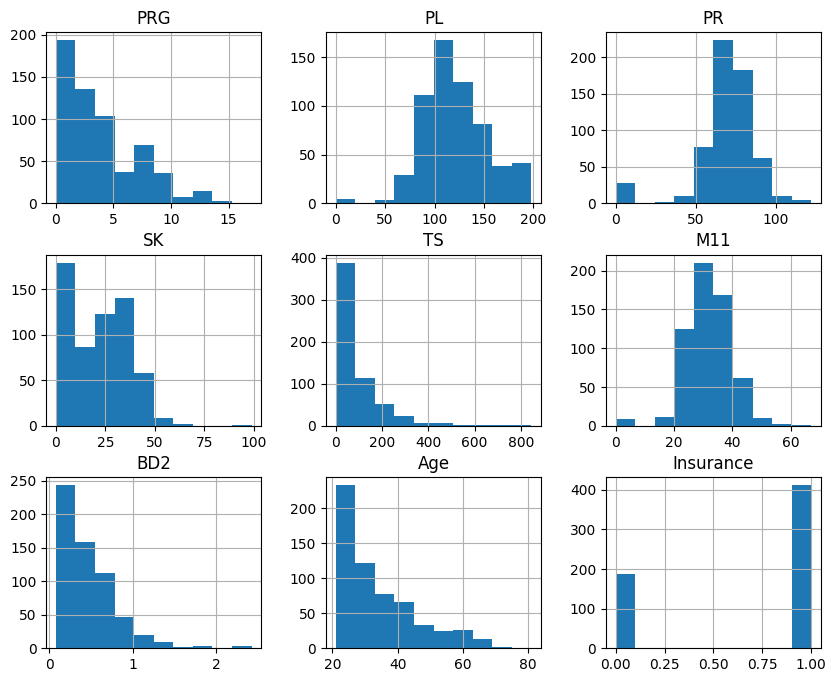

In [7]:
## Skewness of the data
print('Skewness of the data:')
print(round(df.drop(['Sepssis',"ID"],axis=1).skew(), 2))

## Plot a histogram 
df.hist(figsize=[10,8])
plt.show()

Check for outliers

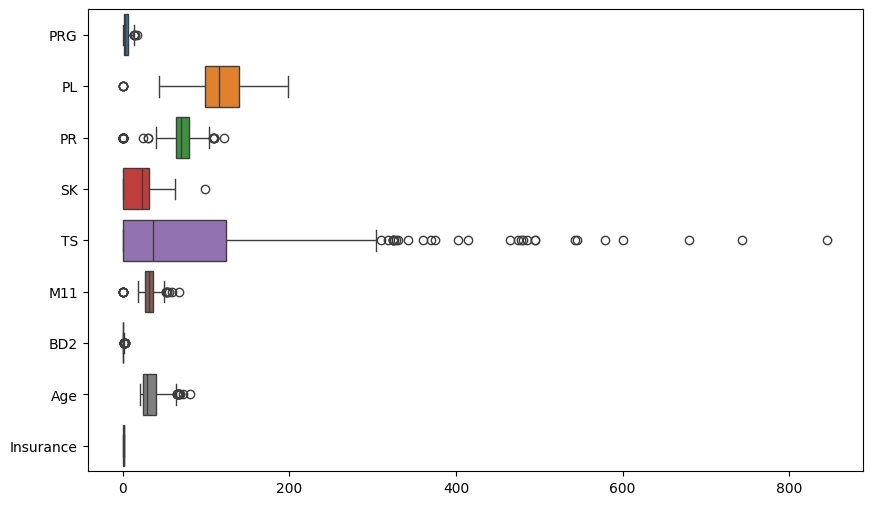

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.drop(['Sepssis','ID'],axis=1), orient='h')
plt.show()

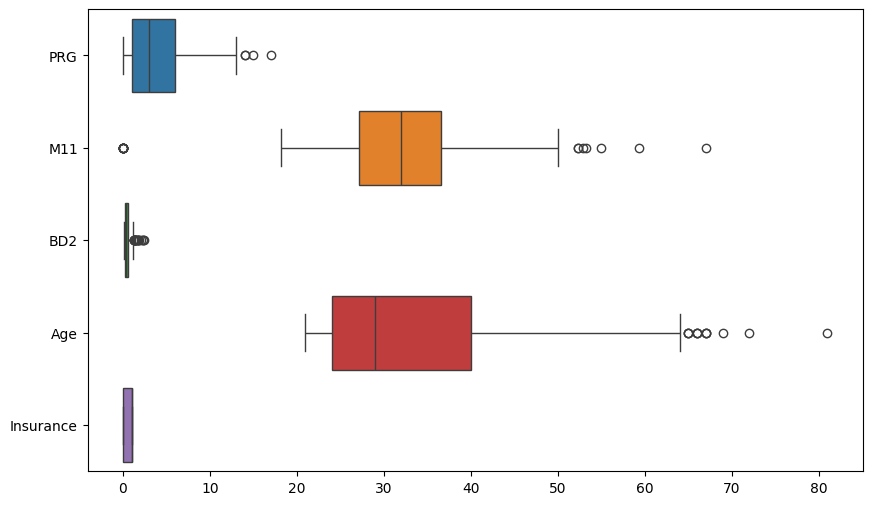

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.drop(['PL','PR','TS','Sepssis','ID','SK'], axis=1), orient='h')
plt.show()

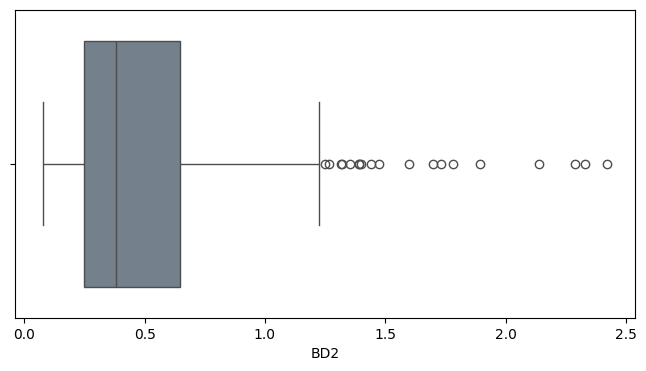

In [10]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df['BD2'], orient='h', color='slategrey')
plt.show()

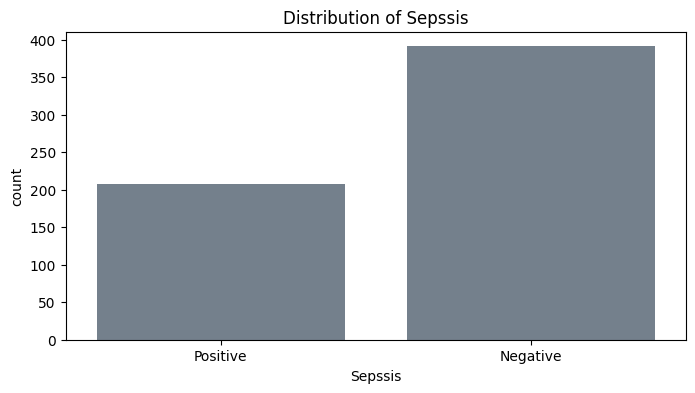

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Sepssis', color='slategrey')
plt.title("Distribution of Sepssis")
plt.show()

**BIVARIATE ANALYSIS**

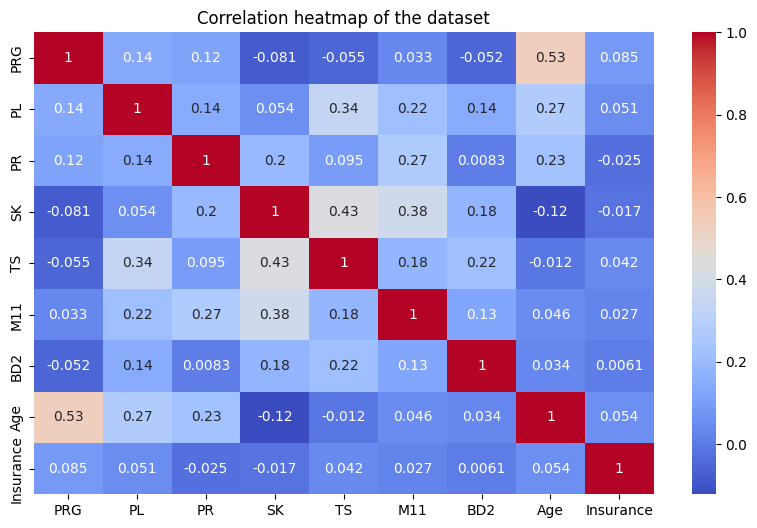

In [12]:
# The correlation of numeric values 
correlation_matrix = df.corr(numeric_only= True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation heatmap of the dataset")
plt.show()

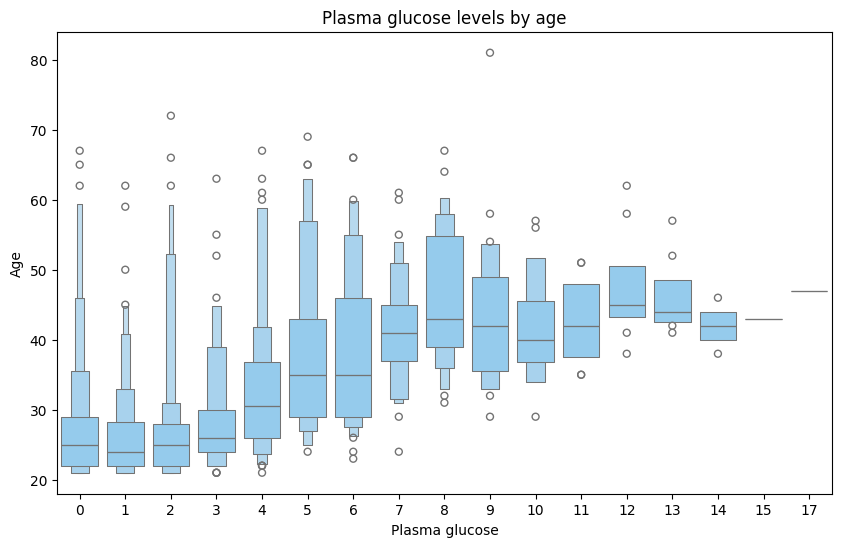

In [13]:
##Check plasma glucose by age
plt.figure(figsize=(10,6))
sns.boxenplot(df, x='PRG', y='Age',k_depth='trustworthy', color='lightskyblue')
plt.xlabel('Plasma glucose')
plt.title('Plasma glucose levels by age')
plt.show()

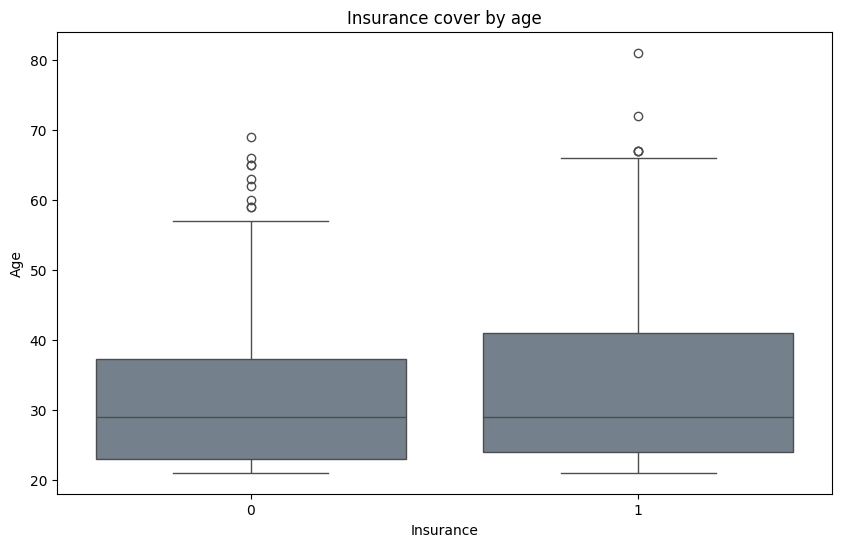

In [14]:
## Plot insurance coverage by age
plt.figure(figsize=(10,6))
sns.boxplot(df, x='Insurance', y='Age', color='slategrey')
plt.title('Insurance cover by age')
plt.show()

<Figure size 1000x600 with 0 Axes>

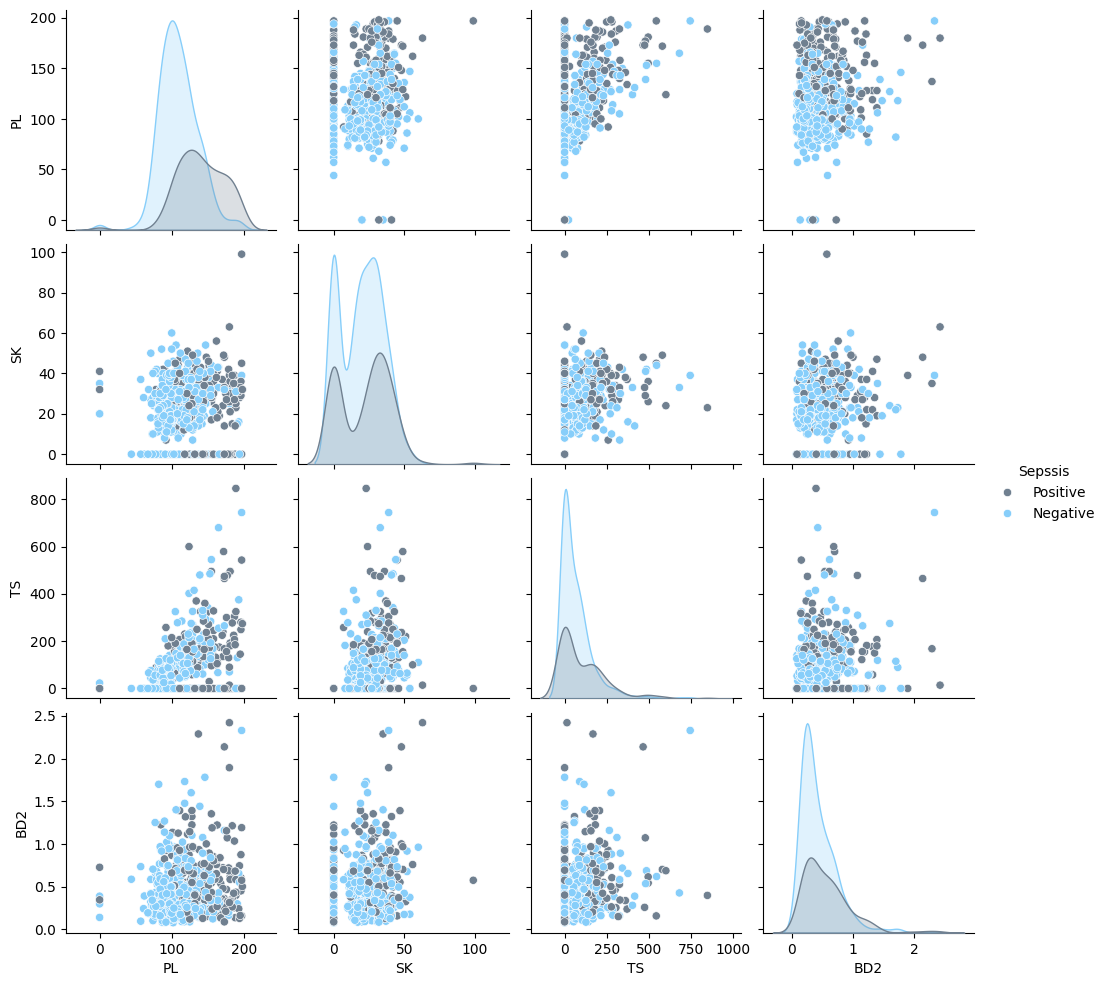

In [15]:
## Blood work results across patients at risk of Sepsis
plt.figure(figsize=(10,6))
sns.pairplot(df, vars=['PL','SK','TS','BD2'], hue='Sepssis', palette=['slategrey', 'lightskyblue'])
plt.show()

**MULTIVARIATE ANALYSIS**

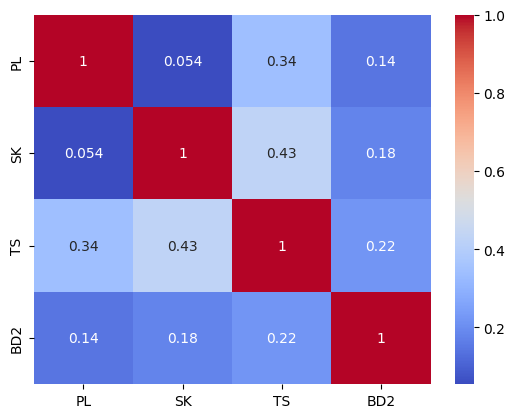

In [16]:
bloodworkresults = df[['PL', 'SK', 'TS', 'BD2']]
bloodworkresults

matrix = bloodworkresults.corr()
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.show()

### **KEY INSIGHTS**

* From our EDA analysis, the dataset has 599 entries with no missing entries or duplicate entries. 

* From our Univariate distribution, we can tell that there are a lot of outliers in the dataset. Hence, most of our columns were either positively skewed or negatively skewed.

* The Sepssis column is highly imbalanced with most entries geared towards negative responses.


* There is zero correlation between columns aside from PRG(plasma glucose) and Age column which clearly indicates a slight correlation between them

* With the boxen plot, we can see that age has an influence on the plasma glucose levels. An increase in age, has an effect on the normal ranges of plasma glucose levels.

* Many seem to have insurance as compared to the few who were below 40 and did not have insurance.

* In comparison to the blood work  results against risk for sepssis, there is a correlation between PL AND BD2 blood work results which indicate that from the results a patient may be at risk for sepssis. The rest of the blood work results show no indication of relation and influence on the risk for sepssis.

* The correlation between blood work results seems to not affect each other, however SK AND TS have a correlation of 0.43 higher than the rest of the blood work results. Indicating a possiblity of influence on the risk for sepssis. 


**ANALYTICAL QUESTIONS**

**1. Does the age of a patient in the Intensive Care Unit (ICU) have a higher risk of developing sepsis compared to a patient with a similar age who is not in the ICU?**

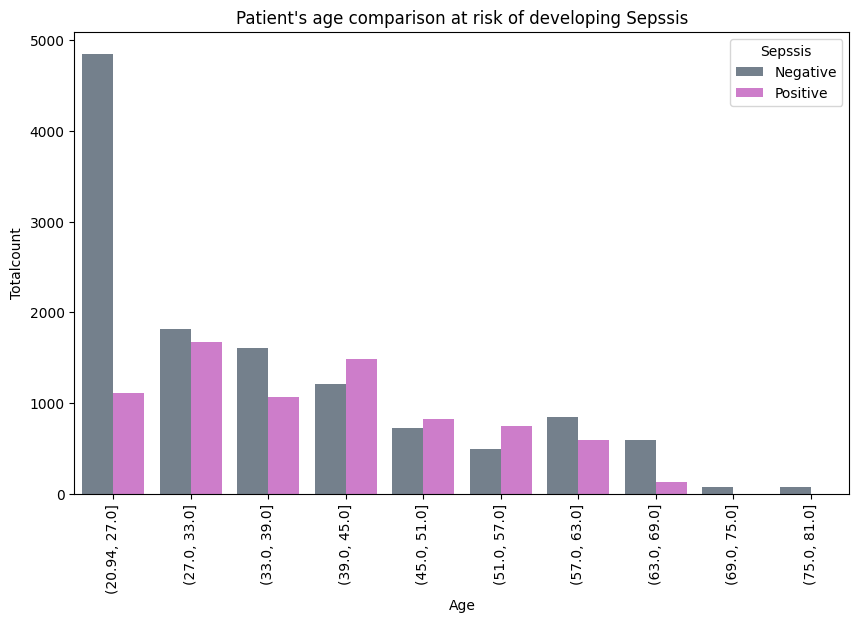

In [17]:
patients_age = df.groupby(['Sepssis',pd.cut(df.Age,bins=10)])['Age'].sum().rename('Totalcount').reset_index()

patients_age=patients_age.sort_values(by='Totalcount', ascending=False)
patients_age

## Visualization of patient's age at risk of developing sepsis
plt.figure(figsize=(10, 6))
sns.barplot(patients_age, x='Age', y='Totalcount', hue='Sepssis', palette=['slategrey','orchid'])
plt.title("Patient's age comparison at risk of developing Sepssis")
plt.xticks(rotation= 90)
plt.show()

#### ***INSIGHTS***

* The age of a patient in the ICU indeed has an effect of risk of developing sepsis. Those who are younger or in their youth have great immune systems hence show no risk of developing sepsis. However, those who are older/ above 40 have a greater risk of developing sepsis.

**2. Does a higher plasma glucose contribute to a patient in risk of sepsis?**

*Normal plasma glucose levels range between 3.9 and 7.1mmol/L(70 and 130mg/dl)*

<Figure size 1000x600 with 0 Axes>

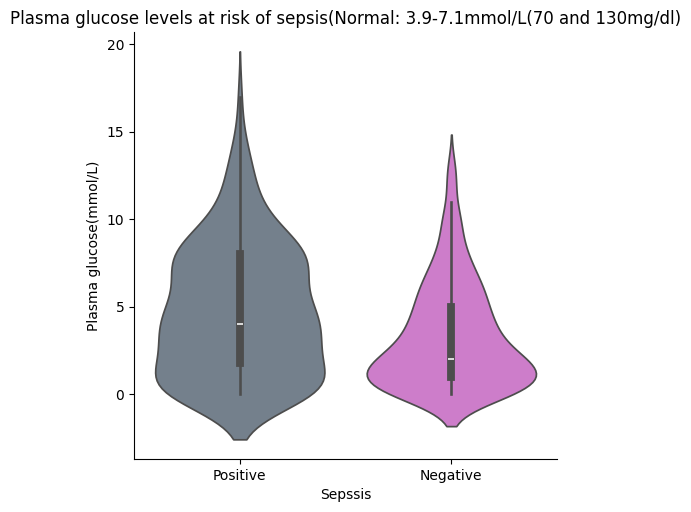

In [18]:
plt.figure(figsize=(10, 6))
sns.catplot(df, y='PRG', x='Sepssis',hue='Sepssis', kind='violin',palette=['slategrey','orchid'])
plt.ylabel('Plasma glucose(mmol/L)')
plt.title('Plasma glucose levels at risk of sepsis(Normal: 3.9-7.1mmol/L(70 and 130mg/dl)')
plt.show()

#### ***INSIGHTS***

* From our analysis, for as long as plasma glucose levels are within the normal range the patients are less likely to develop sepsis. However, other underlying factors may cause a patient to develop sepsis even when the plasma glucose levels are within the normal range.

**3. Does blood pressure correlate to the patient getting sepsis?**

* Normal blood pressure range 90/60 mm/hg to 120/80 mm/hg systolic and diastolic respectively*

<Figure size 1000x600 with 0 Axes>

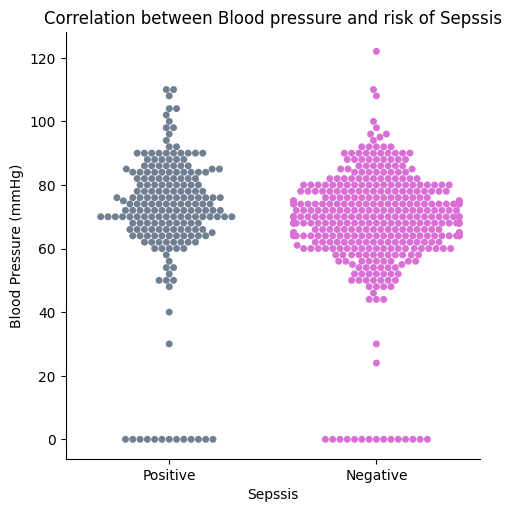

In [19]:
plt.figure(figsize=(10, 6))
sns.catplot(df, x='Sepssis', y='PR', hue='Sepssis', kind='swarm',palette=['slategrey','orchid'])
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Correlation between Blood pressure and risk of Sepssis')
plt.show()

#### ***INSIGHTS***

* A patient's blood pressure within the normal range is less likely to be at risk for sepssis than when the blood pressure is flucuating with an increase, the patient is likely to succumb to sepssis.

**4. How does BMI influence a patient's risk for sepsis in the ICU?**

*Normal BMI is between 18.5 and 24.9 kg/m2*

In [20]:
BMI= df.groupby('Sepssis')['M11'].mean()
BMI

Sepssis
Negative    30.076471
Positive    35.385577
Name: M11, dtype: float64

<Figure size 1000x800 with 0 Axes>

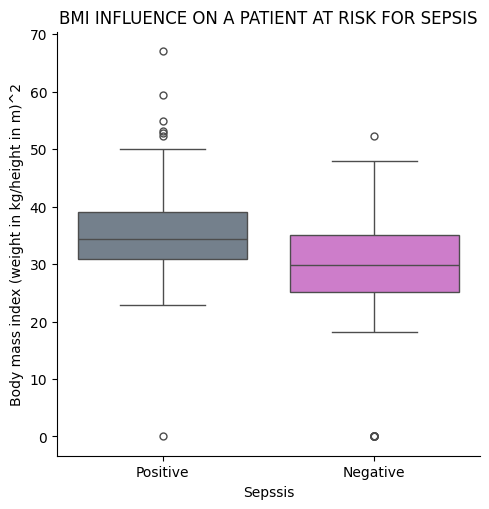

In [21]:
plt.figure(figsize=(10, 8))
sns.catplot(df, x='Sepssis', y='M11', kind='box',palette=['slategrey','orchid'])
plt.ylabel('Body mass index (weight in kg/height in m)^2')
plt.title('BMI INFLUENCE ON A PATIENT AT RISK FOR SEPSIS')
plt.show()

#### ***INSIGHTS***

* BMI index has an influence on a patient's risk for sepssis. Beyond the normal index, patients in the ICU  will likely succumb to developing Sepssis.


**5. Is there a comparison between the blood work results and the risk of sepsis?**

In [22]:
bloodwork = df.groupby('Sepssis')[['PL', 'SK', 'TS', 'BD2']].mean()
bloodwork

,PL,SK,TS,BD2
Sepssis,,,,
Negative,109.442455,19.680307,67.066496,0.436524
Positive,140.288462,22.221154,102.759615,0.565144


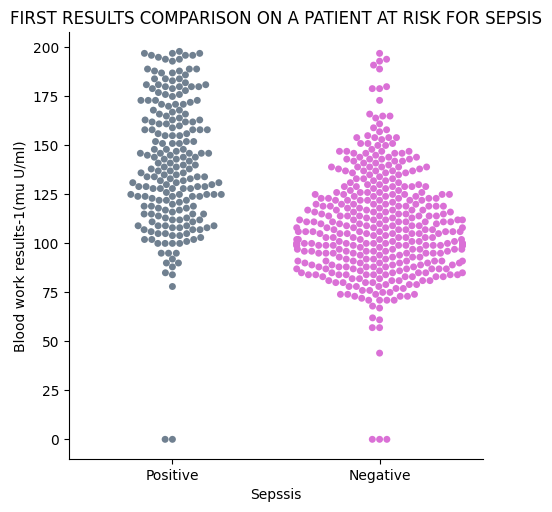

In [23]:
sns.catplot(df, x='Sepssis', y='PL', kind='swarm',palette=['slategrey','orchid'])
plt.ylabel('Blood work results-1(mu U/ml)')
plt.title('FIRST RESULTS COMPARISON ON A PATIENT AT RISK FOR SEPSIS')
plt.show()

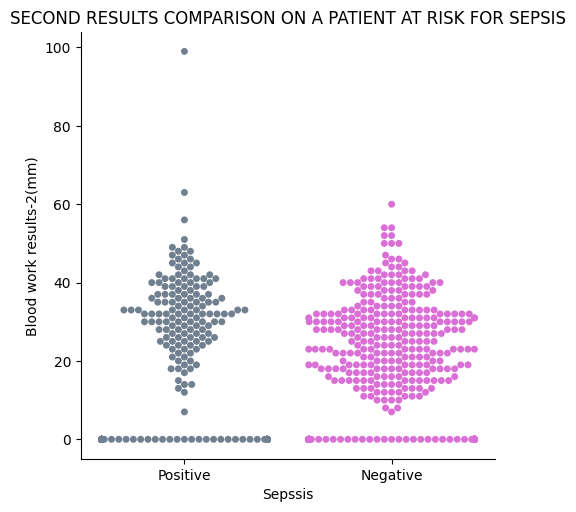

In [24]:
sns.catplot(df, x='Sepssis', y='SK', kind='swarm',palette=['slategrey','orchid'])
plt.ylabel('Blood work results-2(mm)')
plt.title('SECOND RESULTS COMPARISON ON A PATIENT AT RISK FOR SEPSIS')
plt.show()

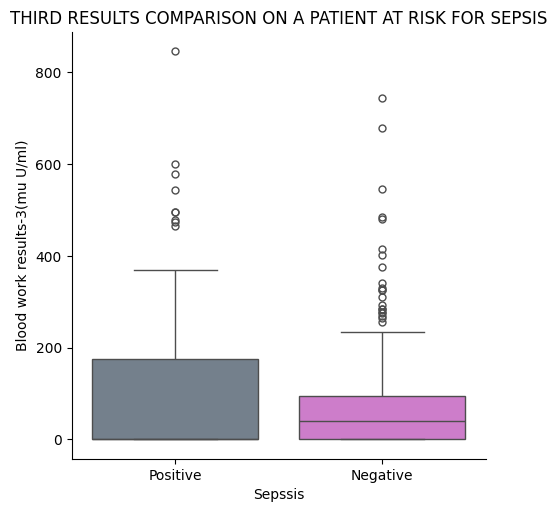

In [25]:
sns.catplot(df, x='Sepssis', y='TS', kind='box',palette=['slategrey','orchid'])
plt.ylabel('Blood work results-3(mu U/ml)')
plt.title('THIRD RESULTS COMPARISON ON A PATIENT AT RISK FOR SEPSIS')
plt.show()

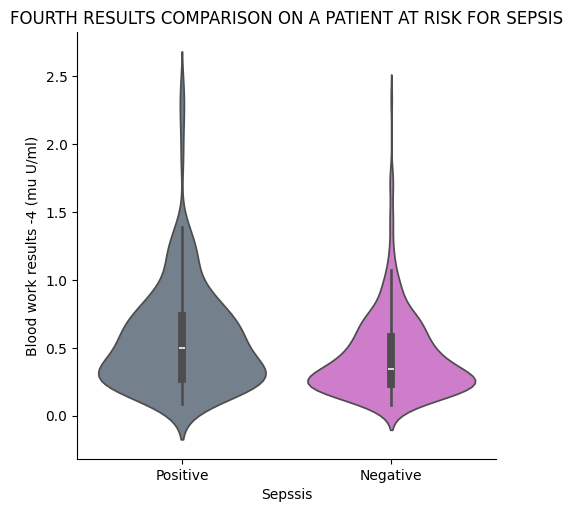

In [26]:
sns.catplot(df, x='Sepssis', y='BD2',hue='Sepssis', kind='violin',palette=['slategrey','orchid'])
plt.ylabel('Blood work results -4 (mu U/ml)')
plt.title('FOURTH RESULTS COMPARISON ON A PATIENT AT RISK FOR SEPSIS')
plt.show()

#### ***INSIGHTS***

* From our analysis, the blood work results have a significant influence on a patient's risk for sepssis. 

* In PL results, an increase of range of values within the blood work results, poses a threat to patients who are in the ICU. 

* SK blood work results have no impact on a patient's risk for sepssis.

* TS and BD2 blood work results have an impact on a patient's risk for sepssis. With low range values, patients are less at risk for sepssis. As the blood work results increase in range of values, patients are at high risk for sepssis especially BD2 blood work results.



**HYPOTHESIS**

*NULL HYPOTHESIS* - A patient's age in the ICU does not pose a higher risk for sepsis.

*ALTERNATIVE HYPOTHESIS* - A patient's age in the ICU poses a higher risk for sepsis.

In [27]:
positive = df[df['Sepssis'] == 'Positive']['Age']
negative = df[df['Sepssis'] == 'Negative']['Age']

# Perform the two-sample t-test
t_stat, p_val = ttest_ind(positive, negative)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_val)

# Determine the outcome of the test
if p_val < 0.01:
    print("Reject the null hypothesis. A patient's age in the ICU does pose a higher risk for Sepsis.")
else:
    print("Fail to reject the null hypothesis. A patient's age in the ICU does not pose a higher risk for Sepsis.")

T-statistic: 5.254202967191448
P-value: 2.0718778891881853e-07
Reject the null hypothesis. A patient's age in the ICU does pose a higher risk for Sepsis.


In [28]:
# Calculate the mean age for sepsis yes and no
mean_age_sepsis_positive = positive.mean()
mean_age_sepsis_negative = negative.mean()

print("Mean age for sepsis positive:", mean_age_sepsis_positive)
print("Mean age for sepsis negative:", mean_age_sepsis_negative)

# Calculate the difference in mean age
diff_mean_age = mean_age_sepsis_positive - mean_age_sepsis_negative

print("Difference in mean age:", diff_mean_age)

Mean age for sepsis positive: 36.69711538461539
Mean age for sepsis negative: 31.47826086956522
Difference in mean age: 5.218854515050168


#### ***INSIGHTS***

* The null hypothesis was rejected, meaning that a patient's age in the ICU does indeed pose a higher risk for Sepsis.

* The mean age for patients with Sepsis is 36.69 years, while the mean age for patients without Sepsis is 31.47 years.

* The difference in mean age between the two groups is 5.21 years. This indicates that patients with Sepsis are older on average in the ICU.

**CONCLUSION**

* Our analysis reveals that a patient's age in the ICU, plasma glucose levels, blood pressure, body mass index (BMI), blood work results, and the presence of underlying factors can all contribute to the development of Sepsis.

# **DATA CLEANING AND PREPROCESSING**

In [29]:
## Replace columns with lower case
df.columns =[col_name.lower() for col_name in df.columns]

In [30]:
## Drop columns
df.drop('id', axis=1, inplace=True)

In [31]:
df['insurance'] = df['insurance'].map({0:'No', 1:'Yes'})

In [32]:
## Replacing the outliers with the upper and lower bounds
def replace_outliers(X, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
   
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
   
    df[column_name] = df[column_name].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
   
    return df

**DATASET SPLIT**

In [33]:
#predictor variables
X = df.drop(columns=["sepssis"], axis=1)
y = df["sepssis"]

# #split data
X_train, X_eval, y_train, y_eval = train_test_split(X, y, train_size = 0.8, stratify=y, random_state=42)
(X_train.shape, y_train.shape), (X_eval.shape, y_eval.shape)

(((479, 9), (479,)), ((120, 9), (120,)))

In [34]:
## Get feature columns 
input_features = X.columns
print(input_features)

## Encode your target column
targ= LabelEncoder()
y_trained= targ.fit_transform(y_train)
y_evaled = targ.transform(y_eval)

Index(['prg', 'pl', 'pr', 'sk', 'ts', 'm11', 'bd2', 'age', 'insurance'], dtype='object')


In [35]:
def process_columns(X):
   
    numeric_cols = []
    categorical_cols = []
 
    for column in input_features:
        if X[column].dtype != 'object':
            X = replace_outliers(X, column)
            numeric_cols.append(column)
        else:
            categorical_cols.append(column)
 
    return X, numeric_cols, categorical_cols

In [36]:
X, numeric_cols, categorical_cols = process_columns(X)

In [37]:
## Build a pipeline
# prepare numerical pipeline
numerical_pipeline=Pipeline(steps=[
('numerical_imputer',SimpleImputer(strategy='median')),
('scaler', StandardScaler())   
])

categorical_pipeline=Pipeline(steps=[
    ('categorical_imputer', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Column transformer preparation
preprocessor=ColumnTransformer(transformers=[
    ('numerical_pipeline', numerical_pipeline,numeric_cols),
    ('categorical_pipeline', categorical_pipeline, categorical_cols)
])

# **MODELLING**

In [38]:
models = [
    ('random_forest', RandomForestClassifier(n_estimators=300, random_state=42)),
    ('svm', SVC(kernel= "rbf",gamma=0.5, C=1.0, random_state=42, probability=True)),
    ('xgboost', xgb.XGBClassifier(learning_rate=0.1,n_estimators=500, max_depth= 5)),
    ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42))
]

In [39]:
# all pipelines storage dictionary
all_pipelines={}

#creating a metrics dataframe 
metrics_table=pd.DataFrame(columns=['Model_Name','Accuracy','Precision', 'Recall','F1_Score'])
for model, classifier in models:

    # creating final pipeline
    final_pipeline=imbpipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(sampling_strategy='auto',k_neighbors=4,random_state=42)),
        ('feature_importance', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier)
    ])

    #fit data to final pipeline
    final_pipeline.fit(X_train, y_trained)
    all_pipelines[model]=final_pipeline

    #Predicting
    y_pred=final_pipeline.predict(X_eval)
    metrics=classification_report(y_evaled, y_pred, output_dict=True)

   #Get all the metrics of interest
    Accuracy=metrics['accuracy']
    Precision=metrics['weighted avg']['precision']
    Recall=metrics['weighted avg']['recall']
    F1_Score=metrics['weighted avg']['f1-score']

    metrics_table.loc[len(metrics_table)]=[model, Accuracy, Precision, Recall, F1_Score]

metrics_table.sort_values(by='F1_Score', ascending=False, ignore_index=True)

,Model_Name,Accuracy,Precision,Recall,F1_Score
0,GradientBoostingClassifier,0.741667,0.750204,0.741667,0.744646
1,random_forest,0.733333,0.744097,0.733333,0.736889
2,xgboost,0.708333,0.713556,0.708333,0.710503
3,svm,0.675000,0.684800,0.675000,0.678748


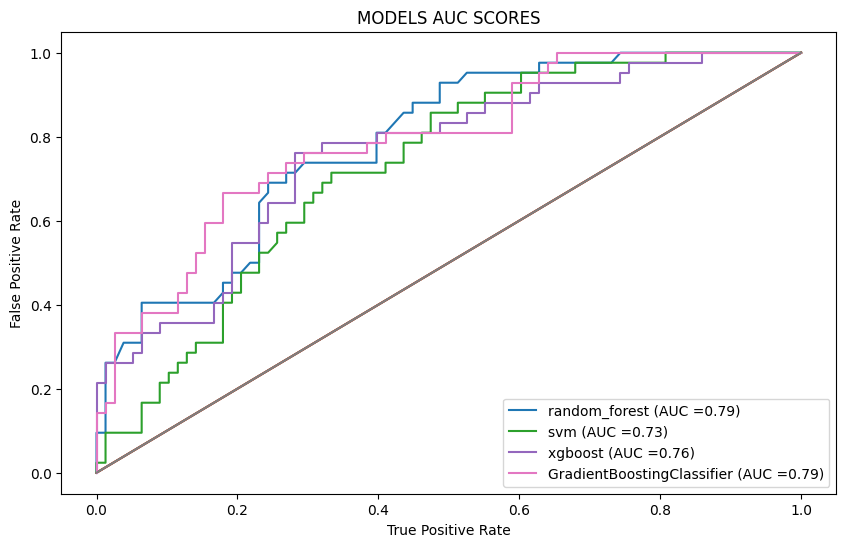

In [40]:
## Check for the AUC SCORE AND ROC CURVE OF ALL THE MODELS
fig, ax = plt.subplots(figsize=(10,6))

all_roc_data ={}

for model_name, pipeline in all_pipelines.items():
    y_score = pipeline.predict_proba(X_eval)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_evaled, y_score)
    
    roc_auc = auc(fpr, tpr)
    
    roc_data_df = pd.DataFrame({"False Positive Rate" : fpr, "True Positive rate ": tpr, "Thresholds": thresholds})
    
    all_roc_data[model_name]=roc_data_df
    
    ax.plot(fpr,tpr, label=f"{model_name} (AUC ={roc_auc:.2f})")
    
    ax.plot([0,1],[0,1])
    ax.set_ylabel("False Positive Rate")
    ax.set_xlabel("True Positive Rate")
    plt.legend()
    plt.title("MODELS AUC SCORES")
    
plt.show()

# **HYPERPARAMETER TUNING** 

In [41]:
all_pipelines['xgboost'].get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'smote', 'feature_importance', 'classifier', 'preprocessor__force_int_remainder_cols', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__numerical_pipeline', 'preprocessor__categorical_pipeline', 'preprocessor__numerical_pipeline__memory', 'preprocessor__numerical_pipeline__steps', 'preprocessor__numerical_pipeline__verbose', 'preprocessor__numerical_pipeline__numerical_imputer', 'preprocessor__numerical_pipeline__scaler', 'preprocessor__numerical_pipeline__numerical_imputer__add_indicator', 'preprocessor__numerical_pipeline__numerical_imputer__copy', 'preprocessor__numerical_pipeline__numerical_imputer__fill_value', 'preprocessor__numerical_pipeline__numerical_imputer__keep_empty_features', 'preprocessor__numerical_pipeline__numerical_imputer__mis

In [57]:
tuned_models = pd.DataFrame(columns=['Model_Name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

# defining parameter grid
param_grids = {
    'svm':{
        'classifier__C': [0.5,0.7,0.8],
        'classifier__gamma': [0.4, 0.5, 0.7]
        },
    'random_forest': {'classifier__n_estimators': [100, 200, 300],
                        'classifier__min_samples_split': [2, 5, 10],
                        'classifier__min_samples_leaf': [2,5,10],
                        'classifier__max_features': ['auto', 'sqrt', 'log2']
                        },
    'xgboost': { 'classifier__learning_rate': [0.1, 1, 10, 100],
                'classifier__gamma':[0.01, 0.1, 1.0],
                'classifier__max_leaves': [5,7, 8,9]
                
                },
    'GradientBoostingClassifier': {
        'classifier__learning_rate' : [1, 0.1, 10, 100],
        'classifier__n_estimators': [100,200,300],
        'classifier__max_features': [10,20,30]
    }   
}

for model_name, pipeline in all_pipelines.items():
    param_grid = param_grids[model_name]
    grid_search = RandomizedSearchCV(pipeline, param_grid, cv=KFold(n_splits=5, shuffle=True), scoring='f1_weighted')
    grid_search.fit(X_train, y_trained)
    
    ## Best parameters
    best_pipeline = grid_search.best_estimator_
    all_pipelines[model_name] = best_pipeline
    
    ## Make predictions 
    y_pred = best_pipeline.predict(X_eval)
    tuned_metrics = classification_report(y_evaled, y_pred, output_dict=True)
    
    ## Model your table 
    tuned_models.loc[len(tuned_models)]=[model_name, 
                                         tuned_metrics['accuracy'], 
                                         tuned_metrics['weighted avg']['precision'], 
                                         tuned_metrics['weighted avg']['recall'], 
                                         tuned_metrics['weighted avg']['f1-score']]
    
## Sort the predictions
tuned_models.sort_values(by='F1_Score', ascending=False, ignore_index=True)

,Model_Name,Accuracy,Precision,Recall,F1_Score
0,random_forest,0.725000,0.742839,0.725000,0.729888
1,GradientBoostingClassifier,0.708333,0.706777,0.708333,0.707505
2,xgboost,0.666667,0.678819,0.666667,0.671111
3,svm,0.650000,0.688710,0.650000,0.658000


#### ***INSIGHTS***

* Our models are performing at an average of 70% F1_Score which is not bad.

* The is little to no performance improvement when it comes to hyperparameter tuning 

**SAVE THE MODELS**

In [43]:
destination= "./toolkit"

## Create a directory path if none
if not os.path.exists(destination):
    os.makedirs(destination)
    
for name,pipeline in all_pipelines.items():
    file_path= os.path.join(destination, f"{name}.joblib")
    joblib.dump(pipeline, file_path)

In [44]:
## Save encoder 

file_path= os.path.join(destination, "label_encoder.joblib")
joblib.dump(targ, file_path)

['./toolkit\\label_encoder.joblib']

# **TEST MODEL**

In [45]:
test = pd.read_csv("Datafiles/Paitients_Files_Test.csv")
test

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0
...,...,...,...,...,...,...,...,...,...,...
164,ICU200773,10,101,76,48,180,32.9,0.171,63,1
165,ICU200774,2,122,70,27,0,36.8,0.340,27,1
166,ICU200775,5,121,72,23,112,26.2,0.245,30,1
167,ICU200776,1,126,60,0,0,30.1,0.349,47,1


**EDA**

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [47]:
test.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [48]:
test.duplicated().sum()

np.int64(0)

In [49]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,169.0,3.917160,3.402415,0.0,1.000,3.000,6.000,13.000
PL,169.0,123.520710,29.259123,56.0,102.000,120.000,141.000,199.000
PR,169.0,70.426036,19.426805,0.0,62.000,74.000,80.000,114.000
SK,169.0,20.443787,15.764962,0.0,0.000,23.000,32.000,49.000
TS,169.0,81.000000,110.720852,0.0,0.000,0.000,135.000,540.000
M11,169.0,32.249704,7.444886,0.0,27.600,32.400,36.600,57.300
BD2,169.0,0.438876,0.306935,0.1,0.223,0.343,0.587,1.698
Age,169.0,33.065089,11.548110,21.0,24.000,28.000,42.000,70.000
Insurance,169.0,0.727811,0.446410,0.0,0.000,1.000,1.000,1.000


**CLEANING**

In [50]:
test.drop("ID", axis=1, inplace=True)

In [51]:
test.columns = [col_name.lower() for col_name in test.columns]

In [52]:
test['insurance'] = test['insurance'].map({0:'No', 1:'Yes'})

**PREDICTIONS**

In [53]:
predictions = all_pipelines['random_forest'].predict(test)

predictions 

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0])

In [54]:
targ.inverse_transform(predictions)

array(['Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positi